<a href="https://colab.research.google.com/github/treeone246/latihanPCD/blob/main/LatihanQuiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%pip install opencv-python scikit-image pillow matplotlib

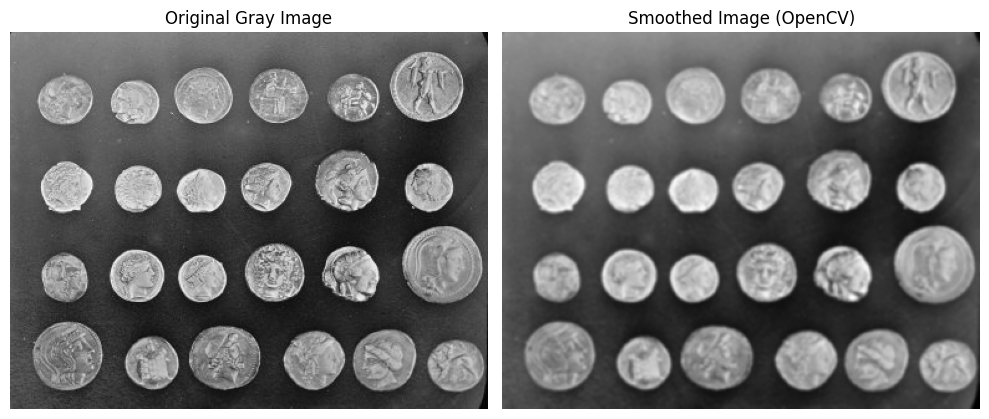

In [5]:
import cv2
from skimage import io
import matplotlib.pyplot as plt

# Load the image
image = io.imread('coins.png')

# Convert to grayscale if it's not already (OpenCV often works with grayscale)
if len(image.shape) > 2:
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
else:
    gray_image = image

# Apply Gaussian smoothing using OpenCV
# Kernel size (ksize) must be odd. (5, 5) is a common choice.
# SigmaX and SigmaY are Gaussian kernel standard deviations. 0 lets the function calculate them.
smoothed_image_cv = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Display the original and smoothed images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title("Original Gray Image")
ax[0].axis('off')

ax[1].imshow(smoothed_image_cv, cmap='gray')
ax[1].set_title("Smoothed Image (OpenCV)")
ax[1].axis('off')

plt.tight_layout()
plt.show()

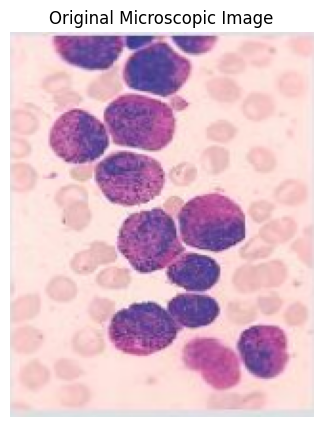

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the uploaded image (replace filename if different)
img = cv2.imread('cells.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(5,5))
plt.imshow(img_rgb)
plt.title("Original Microscopic Image")
plt.axis('off')
plt.show()


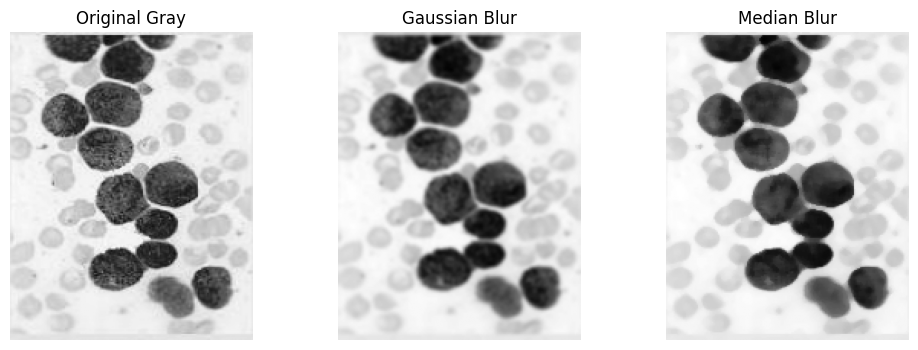

In [7]:
# Apply Gaussian and Median filters
gauss = cv2.GaussianBlur(gray, (5,5), 0)
median = cv2.medianBlur(gray, 5)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(gray, cmap='gray'); plt.title('Original Gray'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(gauss, cmap='gray'); plt.title('Gaussian Blur'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(median, cmap='gray'); plt.title('Median Blur'); plt.axis('off')
plt.show()


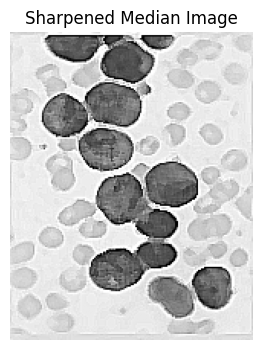

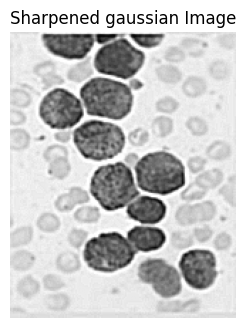

In [8]:
# Use a simple sharpening kernel
kernel_sharp_basic = np.array([[0,-1,0],
                              [-1,5,-1],
                              [0,-1,0]])

kernel_sharp_mild = np.array([[0, -0.5, 0],
                              [-0.5, 3, -0.5],
                              [0, -0.5, 0]])

kernel_sharp_strong = np.array([[-1, -1, -1],
                                [-1, 9, -1],
                                [-1, -1, -1]])

kernel_sharp_custom = np.array([[1, -2, 1],
                                [-2, 5, -2],
                                [1, -2, 1]])

sharp_median = cv2.filter2D(median, -1, kernel_sharp_strong)
sharp_gaussian = cv2.filter2D(gauss, -1, kernel_sharp_strong)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(sharp_median, cmap='gray')
plt.title("Sharpened Median Image")
plt.axis('off')
plt.show()

plt.subplot(1,2,2)
plt.imshow(sharp_gaussian, cmap='gray')
plt.title("Sharpened gaussian Image")
plt.axis('off')
plt.show()

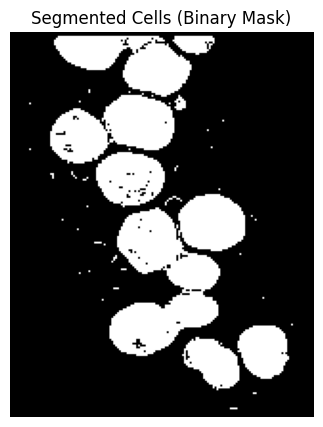

In [9]:
# Apply Otsu's automatic thresholding
_, th = cv2.threshold(sharp_median, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Invert so cells appear white on black background
th_inv = cv2.bitwise_not(th)

plt.figure(figsize=(5,5))
plt.imshow(th_inv, cmap='gray')
plt.title("Segmented Cells (Binary Mask)")
plt.axis('off')
plt.show()


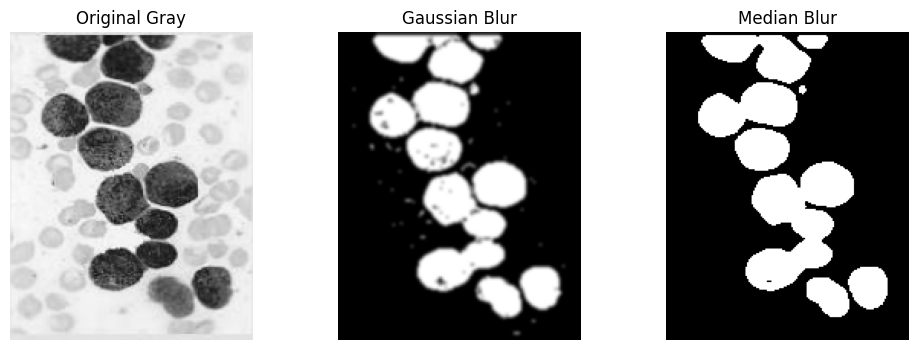

In [10]:
gauss_seg = cv2.GaussianBlur(th_inv, (5,5), 0)
median_seg = cv2.medianBlur(th_inv, 5)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(gray, cmap='gray'); plt.title('Original Gray'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(gauss_seg, cmap='gray'); plt.title('Gaussian Blur'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(median_seg, cmap='gray'); plt.title('Median Blur'); plt.axis('off')
plt.show()

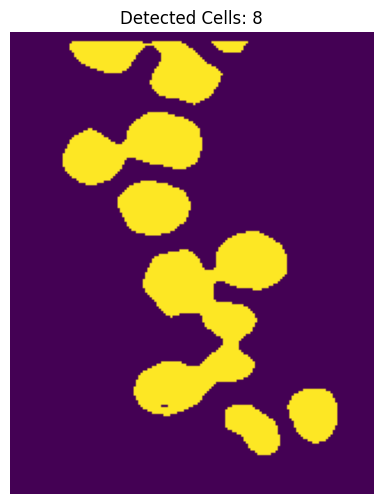

Total detected cells: 8


In [12]:
contours, _ = cv2.findContours(median_seg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
count = len(contours)

# Draw contours
output = median_seg.copy()
cv2.drawContours(output, contours, -1, (0,255,0), 2)

plt.figure(figsize=(6,6))
plt.imshow(output)
plt.title(f"Detected Cells: {count}")
plt.axis('off')
plt.show()

print("Total detected cells:", count)
